In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [4]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
print(train_data['Sex'].unique())
print(train_data['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]


In [6]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

In [7]:
# Filling missing age values with median, since age is a numerical feature, and likely has a skewed distribution
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Dropping Cabin column as it has too many missing values
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [9]:
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [10]:
# Filling missing embarked with mode, since embarked is a categorical feature, fill missing values with
# most frequent value (mode)

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [11]:
# encoding categorical features
# sex

train_data['Sex'] = train_data['Sex'].map({'male':0, 'female': 1})
test_data['Sex'] = train_data['Sex'].map({'male':0, 'female': 1})

In [12]:
# Embarked
# Using one hot encoding for embarked since it has more than 2 categories
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

In [13]:
# Dropping columns that are unlikely to contribute to the prediction or have high cardinality (Name, Ticket)

train_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [14]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         0 non-null      float64
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked_Q  418 non-null    bool   
 7   Embarked_S  418 non-null    bool   
dtypes: bool(2), float64(3), int64(3)
memory usage: 20.5 KB
None


In [15]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB
None


In [16]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for scaling
numerical_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features in train and test data
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.fit_transform(test_data[numerical_features])

In [17]:
# StandardScaler() : standardizes features by removing the mean and scaling to unit variance
# Scaled_value = value-mean/standard_deviation
# This ensures that each numerical feature has a mean of 0 and a standard deviation of 1, making them comparable in scale

# fit_transform(): computes the mean and standard deviation from train_data and scales the data

# transform(): uses the same mean and standard deviation ( computed from train_data) to scale test_data

In [18]:
from sklearn.model_selection import train_test_split

# Select features and target
X = train_data.drop('Survived', axis=1) 
y = train_data['Survived']

# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

Training set size: 712
Validation set size: 179


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# initializing and training the model
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

# Making predictions on the validation set
y_pred = model.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

# Displaying classification report
print(f"Classificaiton Report:")
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.81
Classificaiton Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Validation Accuracy (Random Forest): {accuracy_rf:.2f}")

# Displaying classification report
print(f"Classificaiton Report (Random Forest):")
print(classification_report(y_val, y_pred_rf))

Validation Accuracy (Random Forest): 0.80
Classificaiton Report (Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [23]:
from sklearn.model_selection import GridSearchCV

# Defining paramter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search with cross-validation 
grid_search = GridSearchCV(
    estimator= RandomForestClassifier(random_state=42),
    param_grid= param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Evaluating the tuned random forest model
y_pred_best_rf = best_rf_model.predict(X_val)
accuracy_best_rf = accuracy_score(y_val, y_pred_best_rf)
print(f"Tuned Random Forest Validation Accuracy: {accuracy_best_rf:.2f}")
print("Classification Report (Tuned Random Forest):")
print(classification_report(y_val, y_pred_best_rf))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Random Forest Validation Accuracy: 0.83
Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



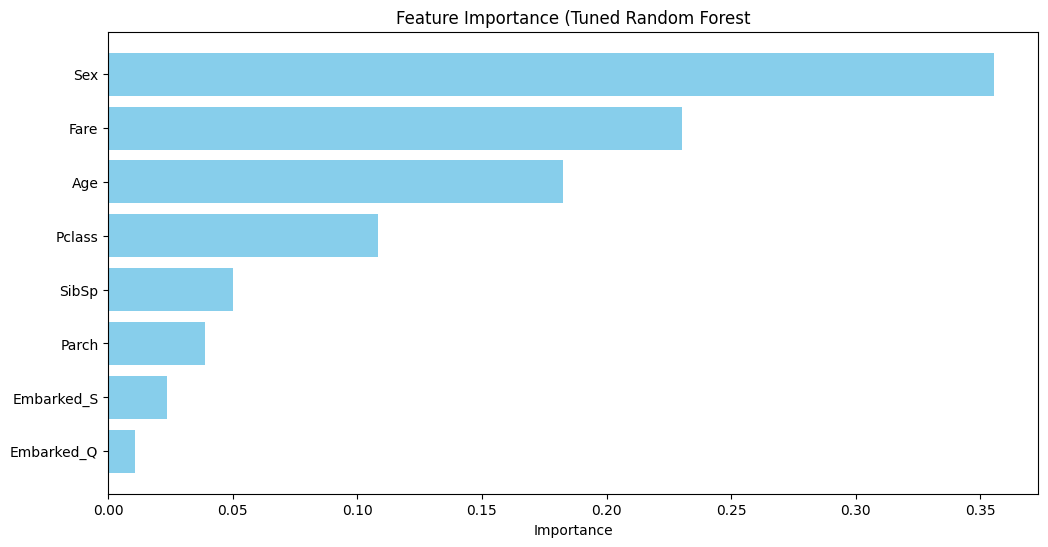

In [24]:
# Analyzing feature importance

import matplotlib.pyplot as plt

# Get feature importance from the tuned random forest model
feature_importance = best_rf_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# plotting the feature importance
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Tuned Random Forest')
plt.gca().invert_yaxis()
plt.show()